In [ ]:
#手の表面を1フレームずつ画像に変換処理--(pro1)
import cv2
import os

inputname=["araiomote","araiura","gotoomote","gotoura","isiiomote","isiiura","mimuraomote","mimuraura",
      "mineomote","mineura","nakaomote","nakaura","okuomote","okuura","saitouhideakiomote",
      "saitouhideakiura","saitouryougaomote","saitouryougaura","sakumaomote","sakumaura",
      "tanakaomote","tanakaura","tochiomote","tochiura","tokuyamaomote","tokuyamaura",
      "watanabeomote","watanabeura","yamaguchiomote","yamaguchiura"]
output=["arai/omote","arai/ura","gotou/omote","gotou/ura","isii/omote","isii/ura",
       "mimura/omote","mimura/ura","mine/omote","mine/ura","nakamura/omote","nakamura/ura",
       "okutani/omote","okutani/ura","saitouhide/omote","saitouhide/ura","saitouryou/omote",
       "saitouryou/ura","sakuma/omote","sakuma/ura","tanaka/omote","tanaka/ura","tochikubo/omote",
       "tochikubo/ura","tokuyama/omote","tokuyama/ura","watanabe/omote","watanabe/ura",
       "yamaguchi/omote","yamaguchi/ura"]
'''
inputname=["araiomote","araiura","gotoomote","gotoura","isiiomote","isiiura","mimuraomote","mimuraura",
      "mineomote","mineura","nakaomote","nakaura","okuomote","okuura","tochiomote","tochiura"]
output=["arai/omote","arai/ura","gotou/omote","gotou/ura","isii/omote","isii/ura",
       "mimura/omote","mimura/ura","mine/omote","mine/ura","nakamura/omote","nakamura/ura",
       "okutani/omote","okutani/ura","tochikubo/omote","tochikubo/ura"]
'''
for i in range(30):#変更必要
    save_dir="./grayhands/"+str(output[i])
    cap=cv2.VideoCapture("./MOV/"+str(inputname[i])+".MOV")
    if not cap.isOpened():
        sys.exit()
    n= 0
    while True:
        # read()でフレーム画像が読み込めたかを示すbool、フレーム画像の配列ndarrayのタプル
        is_image,frame_img = cap.read()
        if is_image:
            # 画像を保存
            outfile=save_dir+"/"+str(n)+".jpg"
            #グレイスケール化
            im_gray = cv2.cvtColor(frame_img, cv2.COLOR_BGR2GRAY)
            cv2.imwrite(outfile, im_gray)
        else:
            # フレーム画像が読込なかったら終了
            break
        n += 1

    cap.release()
    print(str(output[i])+":ok")

In [ ]:
#画像ファイルを読み込んでNumpy形式に変換--(pro2)
import numpy as np
from PIL import Image
import cv2
import os,glob,random

outfile="./num16graylight128.npz"#変更必要
max_photo=40000
photo_size=128#変更必要
x=[]
y=[]

def main():
    glob_files("./grayhands/mine/omote",0)
    glob_files("./grayhands/mine/ura",1)
    glob_files("./grayhands/okutani/omote",2)
    glob_files("./grayhands/okutani/ura",3)
    glob_files("./grayhands/tochikubo/omote",4)
    glob_files("./grayhands/tochikubo/ura",5)
    glob_files("./grayhands/nakamura/omote",6)
    glob_files("./grayhands/nakamura/ura",7)
    glob_files("./grayhands/gotou/omote",8)
    glob_files("./grayhands/gotou/ura",9)
    glob_files("./grayhands/mimura/omote",10)
    glob_files("./grayhands/mimura/ura",11)
    glob_files("./grayhands/arai/omote",12)
    glob_files("./grayhands/arai/ura",13)
    glob_files("./grayhands/isii/omote",14)
    glob_files("./grayhands/isii/ura",15)
    #glob_files("./hands/saitouhide/omote",16)
    #glob_files("./hands/saitouhide/ura",17)
    #glob_files("./hands/saitouryou/omote",18)
    #glob_files("./hands/saitouryou/ura",19)
    #glob_files("./hands/sakuma/omote",20)
    #glob_files("./hands/sakuma/ura",21)
    #glob_files("./hands/tanaka/omote",22)
    #glob_files("./hands/tanaka/ura",23)
    #glob_files("./hands/tokuyama/omote",24)
    #glob_files("./hands/tokuyama/ura",25)
    #glob_files("./hands/watanabe/omote",26)
    #glob_files("./hands/watanabe/ura",27)
    #glob_files("./hands/yamaguchi/omote",28)
    #glob_files("./hands/yamaguchi/ura",29)
    
    
    #glob_files("./hands/sekine/omote",30)
    #glob_files("./hands/sekine/ura",31)
    #glob_files("./hands/toriumi/omote",32)
    #glob_files("./hands/toriumi/ura",33)
    #glob_files("./hands/aizawa/omote",34)
    #glob_files("./hands/aizawa/ura",35)
    np.savez(outfile,x=x,y=y)
    print("保存しました:"+outfile,len(x))
    print(x[0],y[0])
    
def glob_files(path,label):
    files=glob.glob(path+"/*.jpg")
    random.shuffle(files)
    num=0
    for f in files:
        if num>=max_photo: break
        num+=1
        
        #---------Grayscaleの時のプログラム--------------
        img=cv2.imread(f)
        img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img_gray,(photo_size,photo_size))
        
        
        img=np.asarray(img)#1つの配列に格納（この場合2つ）
        x.append(img)
        y.append(label)
if __name__=='__main__':
    main()

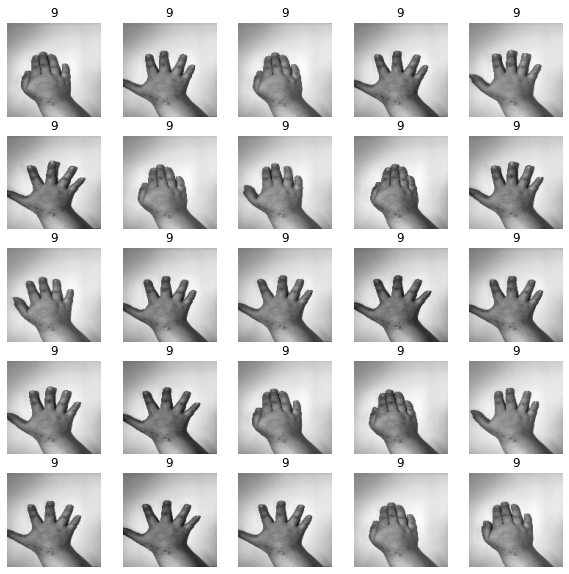

In [1]:
#pro2のnumpyファイルが正しく保存されているかの確認プログラム
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
#写真データ読み込み
photos=np.load('./num16graylight128.npz')
x=photos['x']
y=photos['y']
#開始インデックス
idx=1900
#pyplotで出力
plt.figure(figsize=(10,10))
plt.axis("off")


for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis("off")
    plt.title(y[i+idx])
    plt.imshow(x[i+idx],cmap='gray')

#--------------------画像1枚をピックアップして保存する-----------------------------
#plt.imshow(x[0],cmap='gray')
#plt.savefig('./extract.jpg')
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 29, 64)       

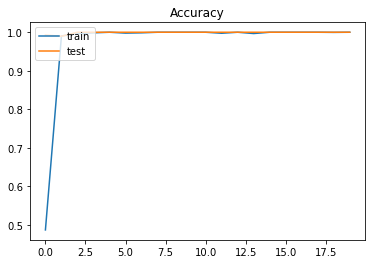

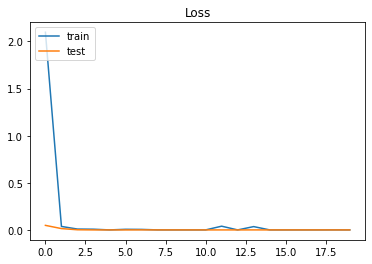

Wall time: 17min 44s


In [4]:
%%time
#CNNモデルの構築とCNNモデルを用いた機械学習--(pro3)
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.summary()
    return model

def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model


im_rows = 128 # 変更必要
im_cols = 128 # 変更必要
im_color = 1
in_shape = (im_rows, im_cols, im_color)
nb_classes = 16 #変更必要

photos = np.load('./num16graylight128.npz')#変更必要
x = photos['x']
y = photos['y']

x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

model = get_model(in_shape, nb_classes)


hist = model.fit(x_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./hdf/num16graylight128batch64pix.hdf5') #変更必要


ここからは0番目の写真です


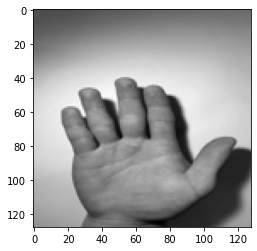

可能性が 98.79379868507385 %なので認証できません。
認証の結果は 新井さんの表 でした。

ここからは1番目の写真です


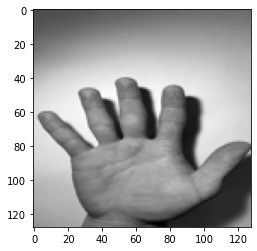

可能性が 79.1725218296051 %なので認証できません。
認証の結果は 栃窪先生の表 でした。

ここからは2番目の写真です


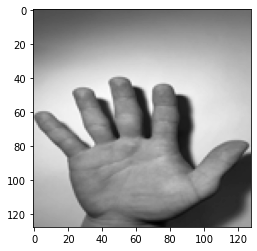

この写真は、 栃窪先生の表 です。
可能性は、 99.9779999256134 %です。

ここからは3番目の写真です


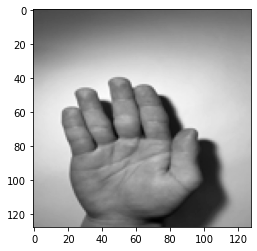

この写真は、 栃窪先生の表 です。
可能性は、 100.0 %です。

ここからは4番目の写真です


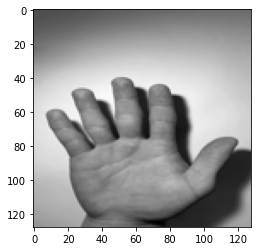

この写真は、 新井さんの表 です。
可能性は、 99.80531930923462 %です。

ここからは5番目の写真です


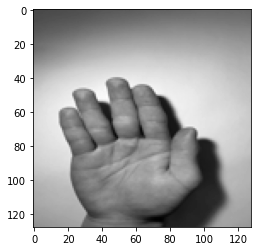

この写真は、 栃窪先生の表 です。
可能性は、 100.0 %です。

ここからは6番目の写真です


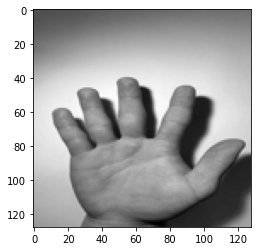

この写真は、 新井さんの表 です。
可能性は、 99.99083280563354 %です。

ここからは7番目の写真です


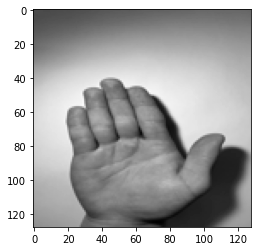

この写真は、 新井さんの表 です。
可能性は、 99.9979019165039 %です。

ここからは8番目の写真です


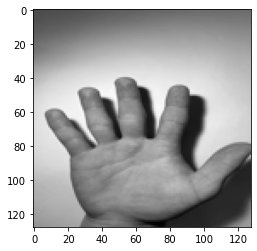

この写真は、 新井さんの表 です。
可能性は、 99.60726499557495 %です。

ここからは9番目の写真です


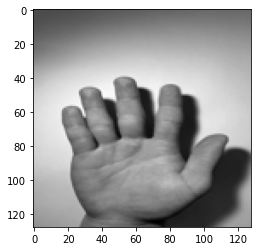

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。
テスト対象の人が変わります

ここからは10番目の写真です


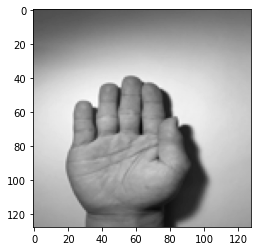

この写真は、 新井さんの表 です。
可能性は、 99.9993085861206 %です。

ここからは11番目の写真です


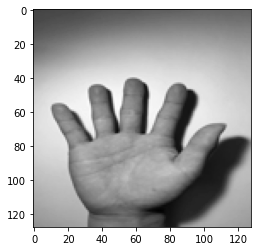

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは12番目の写真です


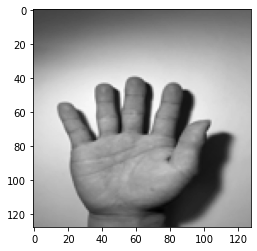

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは13番目の写真です


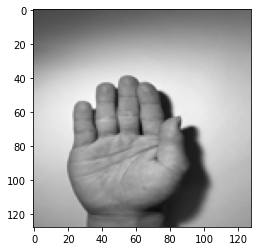

この写真は、 新井さんの表 です。
可能性は、 99.99997615814209 %です。

ここからは14番目の写真です


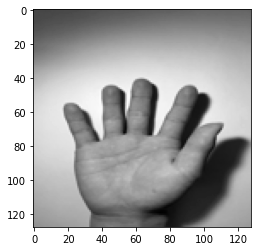

この写真は、 新井さんの表 です。
可能性は、 99.9998927116394 %です。

ここからは15番目の写真です


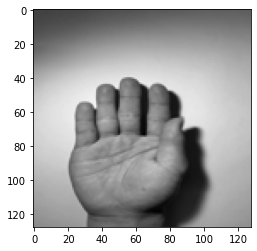

この写真は、 新井さんの表 です。
可能性は、 99.99148845672607 %です。

ここからは16番目の写真です


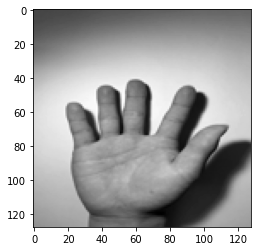

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは17番目の写真です


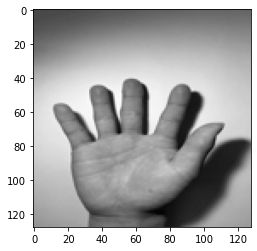

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは18番目の写真です


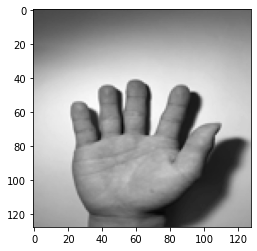

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは19番目の写真です


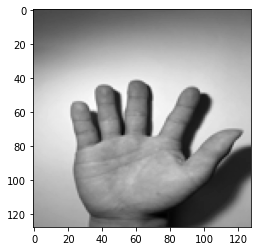

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。
テスト対象の人が変わります

ここからは20番目の写真です


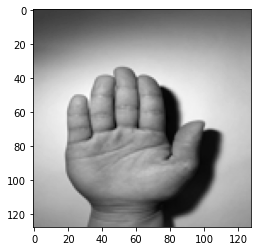

この写真は、 新井さんの表 です。
可能性は、 99.99948740005493 %です。

ここからは21番目の写真です


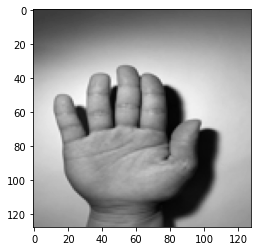

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは22番目の写真です


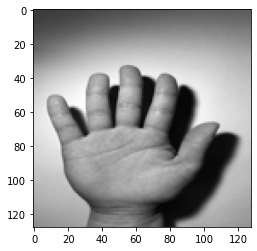

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは23番目の写真です


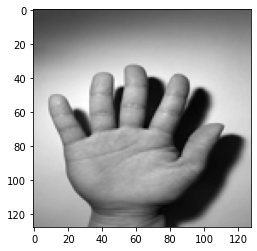

この写真は、 新井さんの表 です。
可能性は、 99.99947547912598 %です。

ここからは24番目の写真です


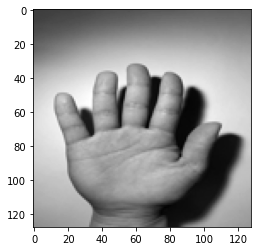

この写真は、 新井さんの表 です。
可能性は、 99.98990297317505 %です。

ここからは25番目の写真です


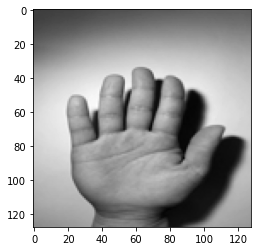

この写真は、 三村君の表 です。
可能性は、 100.0 %です。

ここからは26番目の写真です


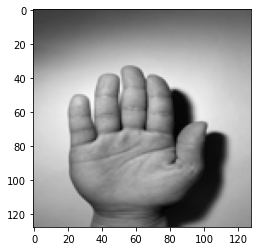

可能性が 78.70086431503296 %なので認証できません。
認証の結果は 新井さんの表 でした。

ここからは27番目の写真です


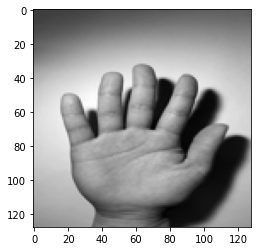

この写真は、 三村君の表 です。
可能性は、 100.0 %です。

ここからは28番目の写真です


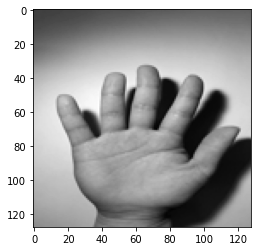

可能性が 97.83596396446228 %なので認証できません。
認証の結果は 三村君の表 でした。

ここからは29番目の写真です


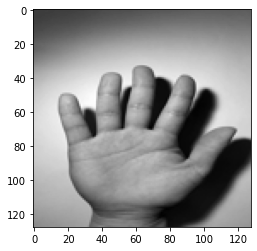

この写真は、 三村君の表 です。
可能性は、 100.0 %です。
テスト対象の人が変わります

ここからは30番目の写真です


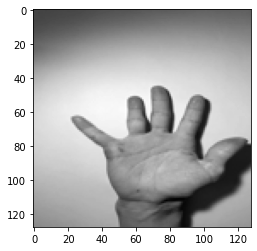

可能性が 86.0686719417572 %なので認証できません。
認証の結果は 新井さんの表 でした。

ここからは31番目の写真です


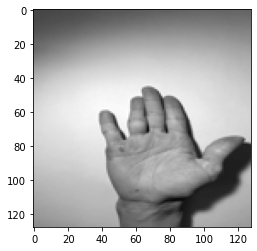

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは32番目の写真です


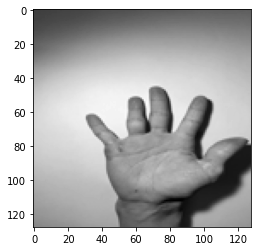

可能性が 53.57811450958252 %なので認証できません。
認証の結果は 新井さんの表 でした。

ここからは33番目の写真です


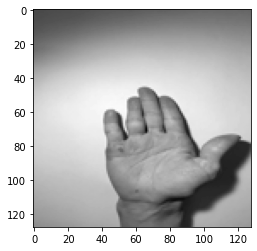

この写真は、 新井さんの表 です。
可能性は、 99.99995231628418 %です。

ここからは34番目の写真です


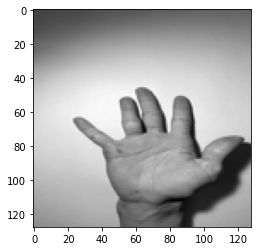

可能性が 86.21273636817932 %なので認証できません。
認証の結果は 新井さんの表 でした。

ここからは35番目の写真です


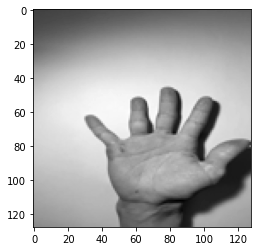

可能性が 85.78224778175354 %なので認証できません。
認証の結果は 石井さんの表 でした。

ここからは36番目の写真です


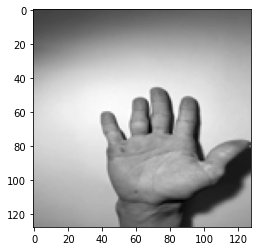

この写真は、 新井さんの表 です。
可能性は、 99.98917579650879 %です。

ここからは37番目の写真です


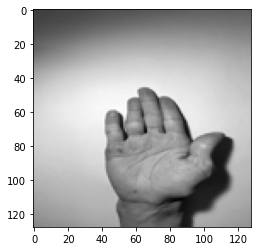

この写真は、 三村君の表 です。
可能性は、 99.80961680412292 %です。

ここからは38番目の写真です


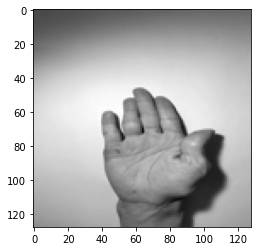

この写真は、 三村君の表 です。
可能性は、 99.88875985145569 %です。

ここからは39番目の写真です


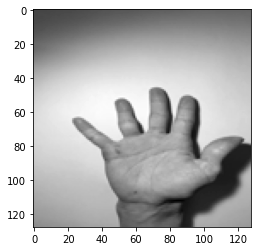

この写真は、 三村君の表 です。
可能性は、 100.0 %です。
テスト対象の人が変わります

ここからは40番目の写真です


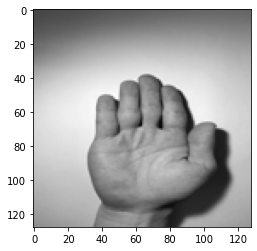

この写真は、 三村君の表 です。
可能性は、 100.0 %です。

ここからは41番目の写真です


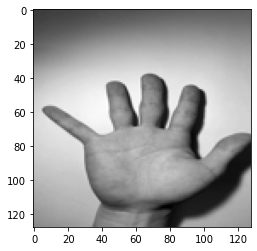

この写真は、 三村君の表 です。
可能性は、 100.0 %です。

ここからは42番目の写真です


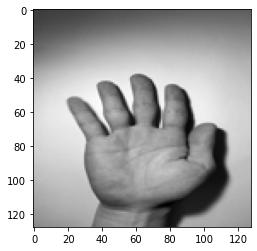

この写真は、 三村君の表 です。
可能性は、 100.0 %です。

ここからは43番目の写真です


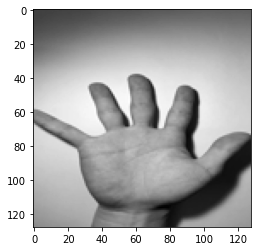

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは44番目の写真です


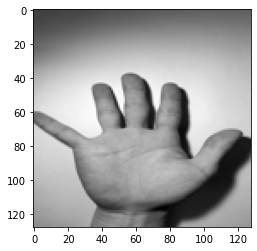

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは45番目の写真です


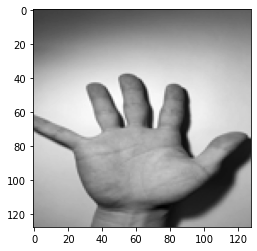

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは46番目の写真です


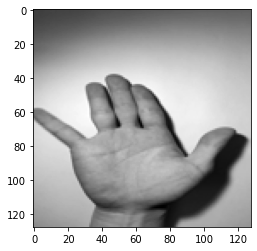

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは47番目の写真です


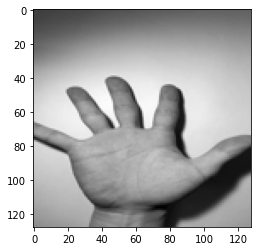

この写真は、 三村君の表 です。
可能性は、 99.9998927116394 %です。

ここからは48番目の写真です


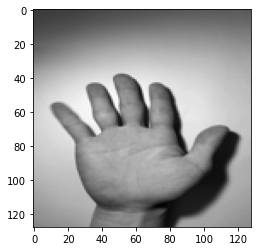

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは49番目の写真です


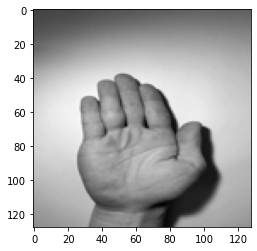

可能性が 72.82970547676086 %なので認証できません。
認証の結果は 後藤さんの表 でした。
テスト対象の人が変わります

ここからは50番目の写真です


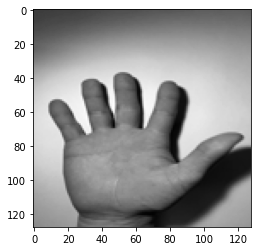

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは51番目の写真です


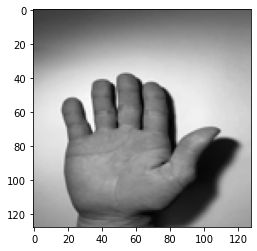

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは52番目の写真です


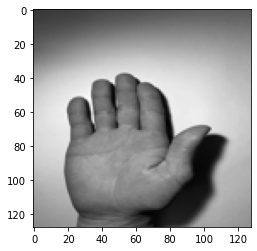

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは53番目の写真です


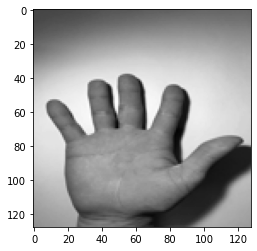

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは54番目の写真です


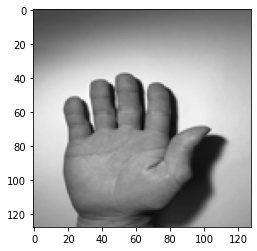

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは55番目の写真です


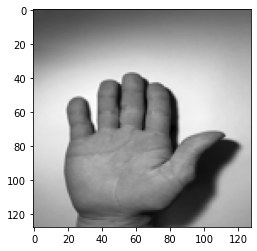

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは56番目の写真です


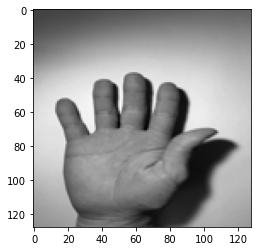

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは57番目の写真です


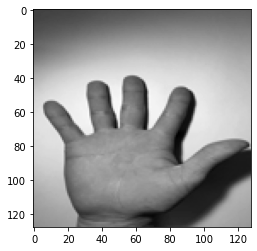

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは58番目の写真です


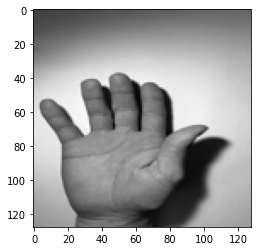

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは59番目の写真です


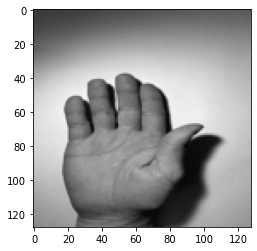

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。
テスト対象の人が変わります

ここからは60番目の写真です


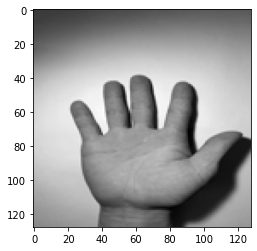

この写真は、 栃窪先生の表 です。
可能性は、 99.97332692146301 %です。

ここからは61番目の写真です


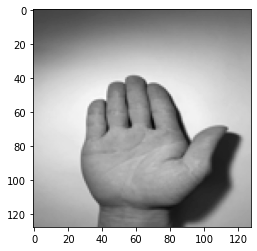

この写真は、 三村君の表 です。
可能性は、 99.99996423721313 %です。

ここからは62番目の写真です


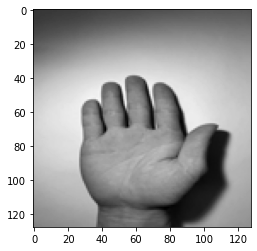

この写真は、 三村君の表 です。
可能性は、 99.97640252113342 %です。

ここからは63番目の写真です


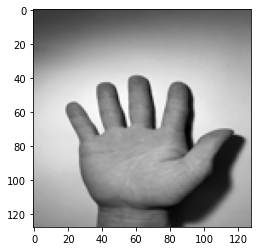

この写真は、 新井さんの表 です。
可能性は、 99.99880790710449 %です。

ここからは64番目の写真です


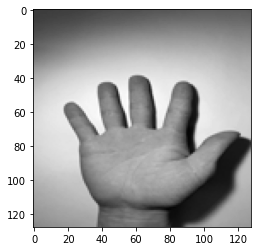

この写真は、 新井さんの表 です。
可能性は、 100.0 %です。

ここからは65番目の写真です


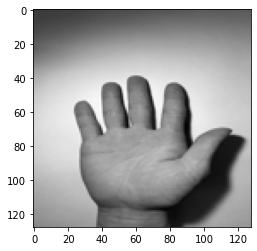

可能性が 94.22467350959778 %なので認証できません。
認証の結果は 三村君の表 でした。

ここからは66番目の写真です


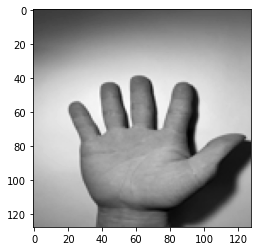

可能性が 98.97496104240417 %なので認証できません。
認証の結果は 新井さんの表 でした。

ここからは67番目の写真です


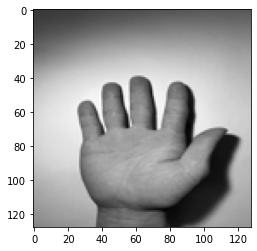

この写真は、 三村君の表 です。
可能性は、 99.9990463256836 %です。

ここからは68番目の写真です


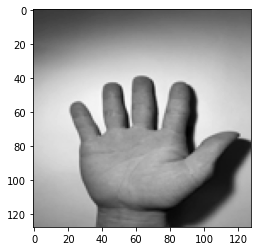

可能性が 94.0658688545227 %なので認証できません。
認証の結果は 三村君の表 でした。

ここからは69番目の写真です


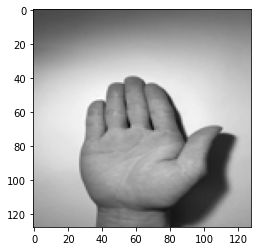

この写真は、 三村君の表 です。
可能性は、 99.99996423721313 %です。
テスト対象の人が変わります

ここからは0番目の写真です


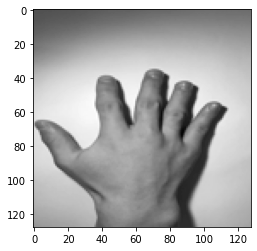

この写真は、 奥谷君の裏 です。
可能性は、 99.99686479568481 %です。

ここからは1番目の写真です


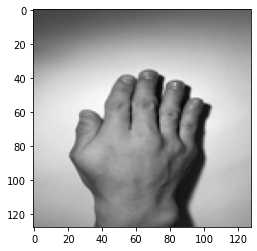

可能性が 98.79416823387146 %なので認証できません。
認証の結果は 奥谷君の裏 でした。

ここからは2番目の写真です


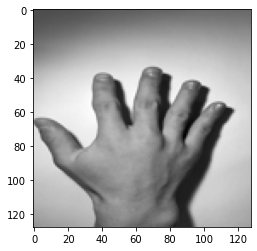

この写真は、 奥谷君の裏 です。
可能性は、 99.98264908790588 %です。

ここからは3番目の写真です


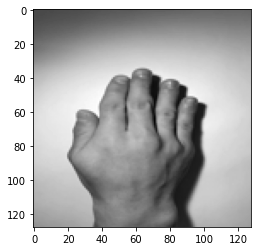

可能性が 72.3515272140503 %なので認証できません。
認証の結果は 奥谷君の裏 でした。

ここからは4番目の写真です


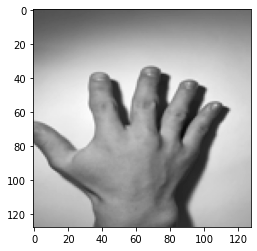

可能性が 48.428234457969666 %なので認証できません。
認証の結果は 江波戸の裏 でした。

ここからは5番目の写真です


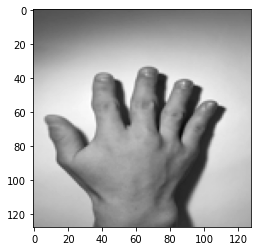

この写真は、 奥谷君の裏 です。
可能性は、 99.41806197166443 %です。

ここからは6番目の写真です


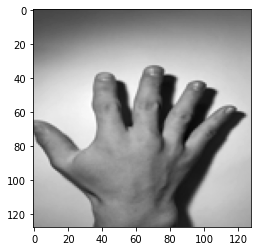

この写真は、 石井さんの裏 です。
可能性は、 99.99220371246338 %です。

ここからは7番目の写真です


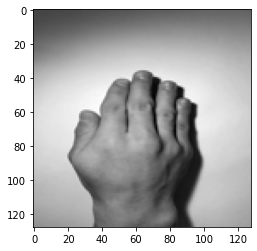

可能性が 96.32463455200195 %なので認証できません。
認証の結果は 三村君の裏 でした。

ここからは8番目の写真です


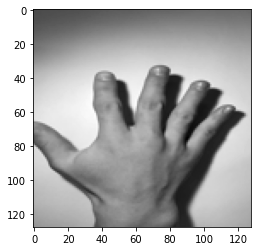

可能性が 57.64381289482117 %なので認証できません。
認証の結果は 石井さんの裏 でした。

ここからは9番目の写真です


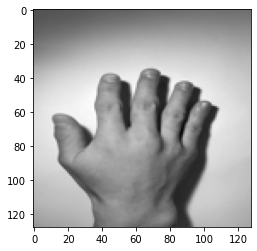

この写真は、 奥谷君の裏 です。
可能性は、 99.65847730636597 %です。
テスト対象の人が変わります

ここからは10番目の写真です


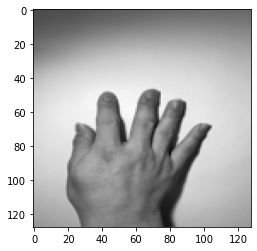

この写真は、 三村君の裏 です。
可能性は、 99.99991655349731 %です。

ここからは11番目の写真です


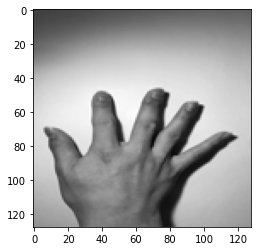

この写真は、 三村君の裏 です。
可能性は、 99.99998807907104 %です。

ここからは12番目の写真です


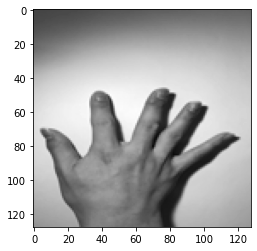

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは13番目の写真です


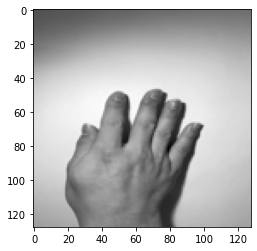

可能性が 91.71804785728455 %なので認証できません。
認証の結果は 三村君の裏 でした。

ここからは14番目の写真です


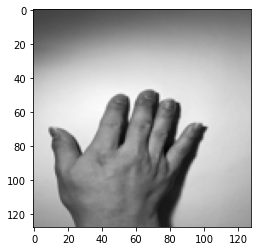

この写真は、 新井さんの裏 です。
可能性は、 99.33810234069824 %です。

ここからは15番目の写真です


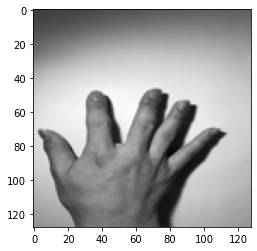

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは16番目の写真です


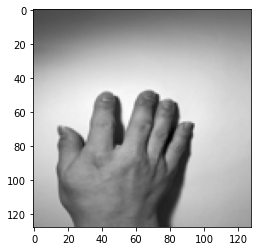

この写真は、 新井さんの裏 です。
可能性は、 99.69381093978882 %です。

ここからは17番目の写真です


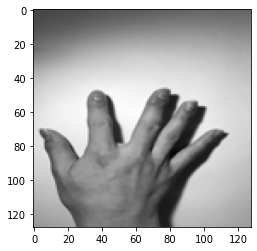

この写真は、 三村君の裏 です。
可能性は、 99.99998807907104 %です。

ここからは18番目の写真です


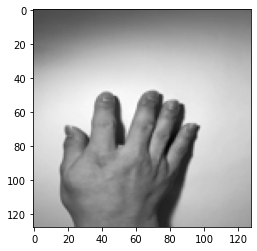

可能性が 81.42889142036438 %なので認証できません。
認証の結果は 三村君の裏 でした。

ここからは19番目の写真です


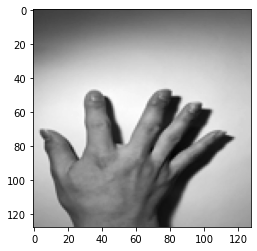

可能性が 95.05200982093811 %なので認証できません。
認証の結果は 三村君の裏 でした。
テスト対象の人が変わります

ここからは20番目の写真です


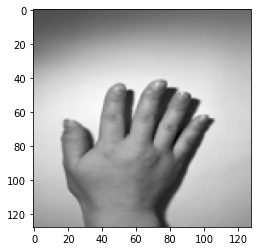

この写真は、 三村君の裏 です。
可能性は、 99.99998807907104 %です。

ここからは21番目の写真です


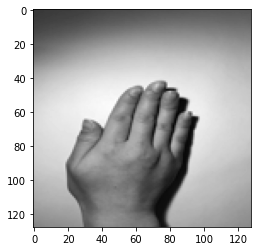

この写真は、 後藤さんの裏 です。
可能性は、 99.8863697052002 %です。

ここからは22番目の写真です


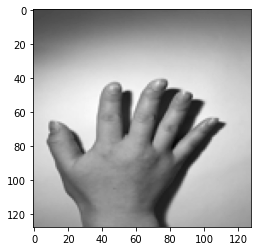

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは23番目の写真です


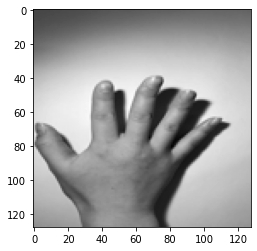

この写真は、 三村君の裏 です。
可能性は、 99.99990463256836 %です。

ここからは24番目の写真です


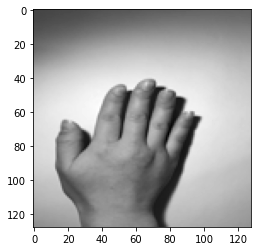

この写真は、 後藤さんの裏 です。
可能性は、 100.0 %です。

ここからは25番目の写真です


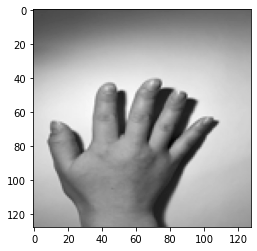

この写真は、 三村君の裏 です。
可能性は、 99.73158240318298 %です。

ここからは26番目の写真です


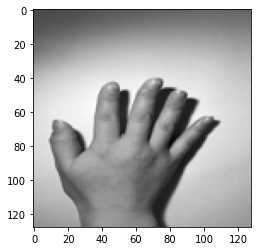

この写真は、 三村君の裏 です。
可能性は、 99.97461438179016 %です。

ここからは27番目の写真です


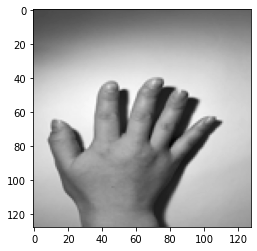

この写真は、 三村君の裏 です。
可能性は、 99.99890327453613 %です。

ここからは28番目の写真です


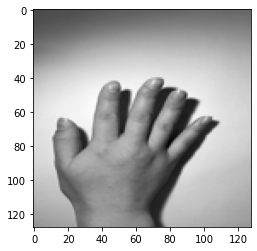

可能性が 88.8522744178772 %なので認証できません。
認証の結果は 後藤さんの裏 でした。

ここからは29番目の写真です


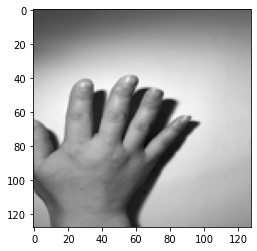

可能性が 51.40711069107056 %なので認証できません。
認証の結果は 後藤さんの裏 でした。
テスト対象の人が変わります

ここからは30番目の写真です


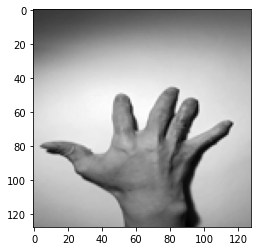

可能性が 95.70404887199402 %なので認証できません。
認証の結果は 三村君の裏 でした。

ここからは31番目の写真です


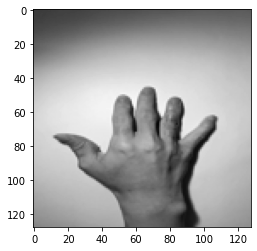

可能性が 96.99703454971313 %なので認証できません。
認証の結果は 新井さんの裏 でした。

ここからは32番目の写真です


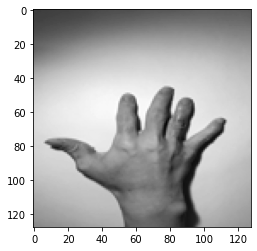

この写真は、 三村君の裏 です。
可能性は、 99.99998807907104 %です。

ここからは33番目の写真です


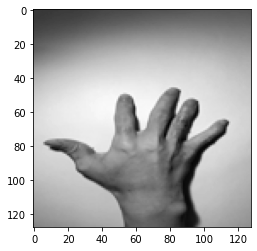

この写真は、 三村君の裏 です。
可能性は、 99.83649849891663 %です。

ここからは34番目の写真です


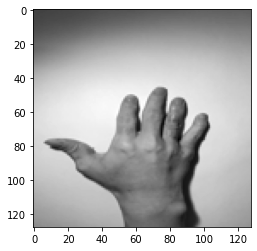

この写真は、 三村君の裏 です。
可能性は、 99.96929168701172 %です。

ここからは35番目の写真です


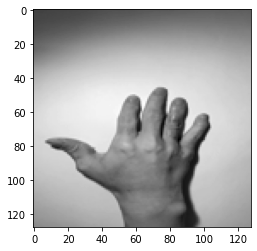

この写真は、 三村君の裏 です。
可能性は、 99.99972581863403 %です。

ここからは36番目の写真です


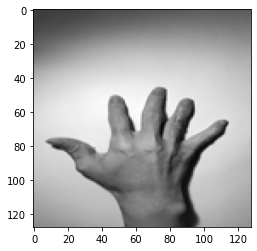

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは37番目の写真です


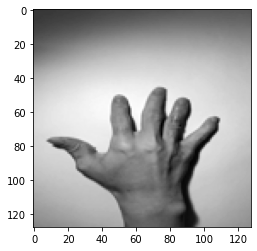

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは38番目の写真です


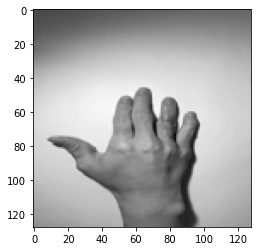

この写真は、 三村君の裏 です。
可能性は、 99.98724460601807 %です。

ここからは39番目の写真です


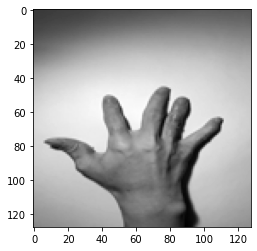

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。
テスト対象の人が変わります

ここからは40番目の写真です


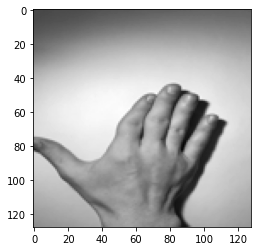

可能性が 58.8675320148468 %なので認証できません。
認証の結果は 三村君の裏 でした。

ここからは41番目の写真です


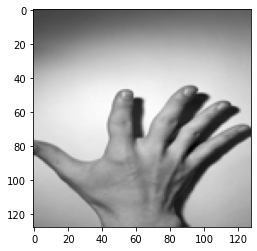

可能性が 69.55052018165588 %なので認証できません。
認証の結果は 石井さんの表 でした。

ここからは42番目の写真です


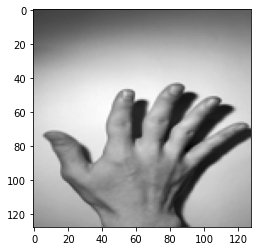

この写真は、 石井さんの表 です。
可能性は、 99.94643330574036 %です。

ここからは43番目の写真です


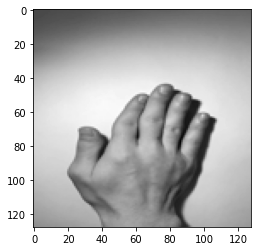

この写真は、 三村君の裏 です。
可能性は、 99.99998807907104 %です。

ここからは44番目の写真です


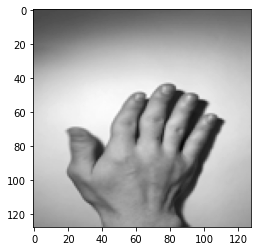

この写真は、 三村君の裏 です。
可能性は、 99.99943971633911 %です。

ここからは45番目の写真です


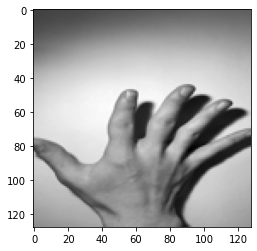

可能性が 53.38926911354065 %なので認証できません。
認証の結果は 石井さんの表 でした。

ここからは46番目の写真です


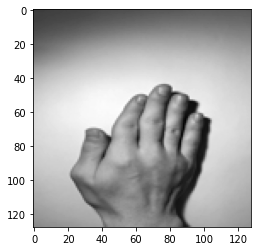

可能性が 67.58944392204285 %なので認証できません。
認証の結果は 三村君の裏 でした。

ここからは47番目の写真です


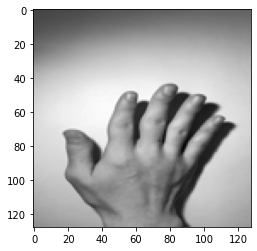

可能性が 74.19634461402893 %なので認証できません。
認証の結果は 新井さんの裏 でした。

ここからは48番目の写真です


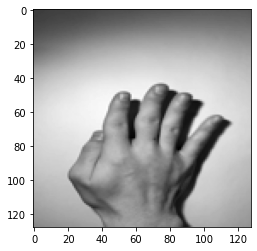

この写真は、 三村君の裏 です。
可能性は、 99.85560774803162 %です。

ここからは49番目の写真です


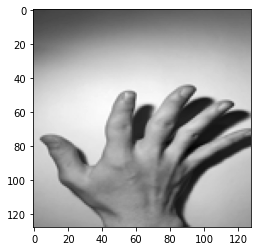

可能性が 97.66179323196411 %なので認証できません。
認証の結果は 新井さんの裏 でした。
テスト対象の人が変わります

ここからは50番目の写真です


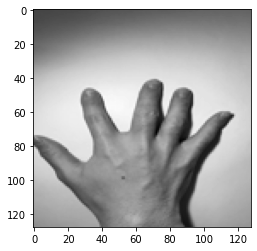

可能性が 91.12467765808105 %なので認証できません。
認証の結果は 三村君の裏 でした。

ここからは51番目の写真です


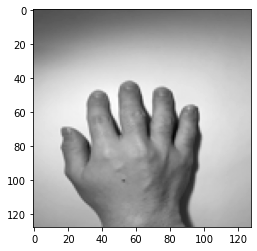

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは52番目の写真です


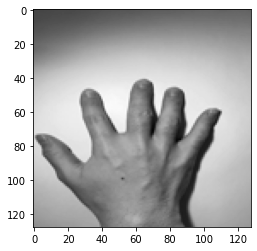

この写真は、 三村君の裏 です。
可能性は、 99.99998807907104 %です。

ここからは53番目の写真です


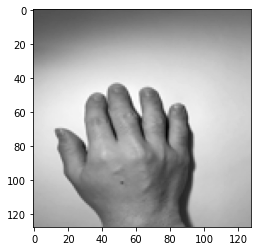

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは54番目の写真です


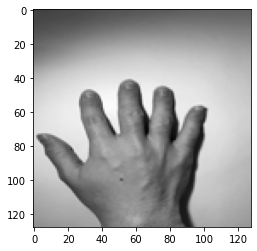

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは55番目の写真です


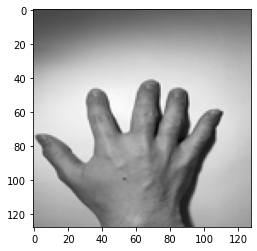

この写真は、 三村君の裏 です。
可能性は、 99.99898672103882 %です。

ここからは56番目の写真です


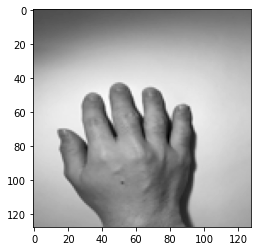

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは57番目の写真です


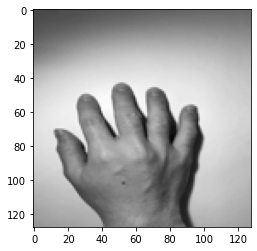

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは58番目の写真です


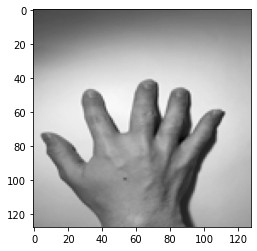

この写真は、 三村君の裏 です。
可能性は、 99.39044117927551 %です。

ここからは59番目の写真です


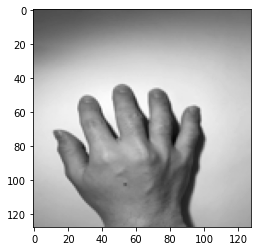

この写真は、 三村君の裏 です。
可能性は、 99.99988079071045 %です。
テスト対象の人が変わります

ここからは60番目の写真です


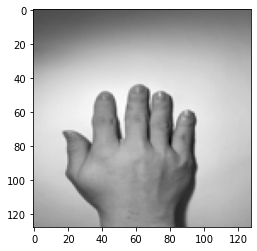

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは61番目の写真です


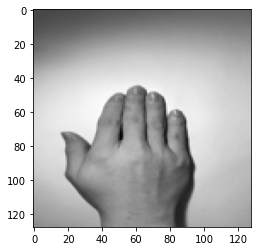

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは62番目の写真です


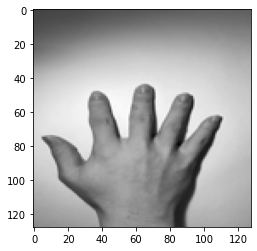

この写真は、 三村君の裏 です。
可能性は、 99.99992847442627 %です。

ここからは63番目の写真です


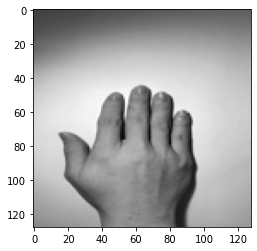

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは64番目の写真です


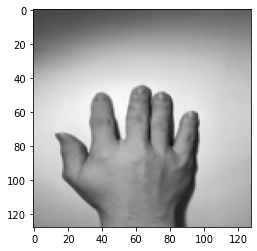

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは65番目の写真です


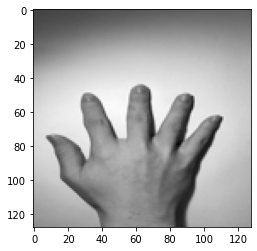

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは66番目の写真です


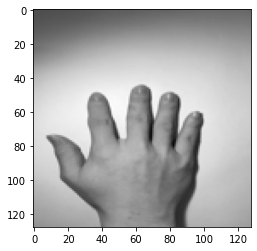

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは67番目の写真です


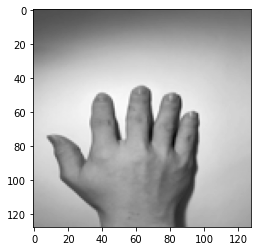

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは68番目の写真です


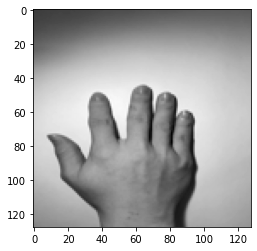

この写真は、 三村君の裏 です。
可能性は、 100.0 %です。

ここからは69番目の写真です


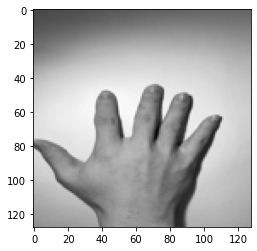

この写真は、 三村君の裏 です。
可能性は、 99.98301267623901 %です。
テスト対象の人が変わります
[99.9779999256134, 100.0, 99.80531930923462, 100.0, 99.99083280563354, 99.9979019165039, 99.60726499557495, 100.0, 99.9993085861206, 100.0, 100.0, 99.99997615814209, 99.9998927116394, 99.99148845672607, 100.0, 100.0, 100.0, 100.0, 99.99948740005493, 100.0, 100.0, 99.99947547912598, 99.98990297317505, 100.0, 100.0, 100.0, 100.0, 99.99995231628418, 99.98917579650879, 99.80961680412292, 99.88875985145569, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.9998927116394, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.97332692146301, 99.99996423721313, 99.97640252113342, 99.99880790710449, 100.0, 99.9990463256836, 99.99996423721313, 99.99686479568481, 99.98264908790588, 99.41806197166443, 99.99220371246338, 99.65847730636597, 99.99991655349731, 99.99998807907104, 100.0, 99.33810234069824, 100.0, 99.69381093978882, 99.99998807907104, 99.99998807907104, 99.8863697052002, 100.0, 99.999904632568

In [11]:
#CNNモデルを用いた機械学習--(pro8)
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model


def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model

#全員用の配列(本人受入率)
'''
omote=["arai/omote","gotou/omote","isii/omote",
       "mimura/omote","mine/omote","nakamura/omote",
       "okutani/omote","saitouhide/omote","saitouryou/omote",
       "sakuma/omote","tanaka/omote","tochikubo/omote",
       "tokuyama/omote","watanabe/omote",
       "yamaguchi/omote"]
ura=["arai/ura","gotou/ura","isii/ura",
       "mimura/ura","mine/ura","nakamura/ura",
       "okutani/ura","saitouhide/ura",
       "saitouryou/ura","sakuma/ura","tanaka/ura",
       "tochikubo/ura","tokuyama/ura","watanabe/ura",
       "yamaguchi/ura"]
'''

#他人受入率用のテスト配列
omote=["saitouhide/omote","saitouryou/omote",
      "sakuma/omote","tanaka/omote","tokuyama/omote","watanabe/omote",
      "yamaguchi/omote"]
ura=["saitouhide/ura","saitouryou/ura",
      "sakuma/ura","tanaka/ura","tokuyama/ura","watanabe/ura",
      "yamaguchi/ura"]
target_omote=[]
target_ura=[]
passpercent=[]
notpasspercent=[]
omotepercent=[]
urapercent=[]
for k in range(7):#変更必要
    for i in range(10):
        target_omote.append("./graytest/"+str(omote[k])+"/"+str(i)+".jpg")#変更必要
        target_ura.append("./graytest/"+str(ura[k])+"/"+str(i)+".jpg")#変更必要

im_rows = 128 #変更必要
im_cols = 128 #変更必要
im_color = 1 #変更必要
in_shape = (im_rows, im_cols, im_color)
nb_classes = 16 #変更必要
#全員用のラベル(本人受入率)
'''
LABELS=["江波戸の表","江波戸の裏","奥谷君の表","奥谷君の裏",
        "栃窪先生の表","栃窪先生の裏","中村君の表","中村君の裏",
        "後藤さんの表","後藤さんの裏","三村君の表","三村君の裏",
        "新井さんの表","新井さんの裏","石井さんの表","石井さんの裏",
        "斎藤ひであきさんの表","斎藤ひであきさんの裏","斎藤りょうがさんの表",
        "斎藤りょうがさんの裏","佐久間さんの表","佐久間さんの裏",
        "田中さんの表","田中さんの裏","徳山さんの表","徳山さんの裏",
        "渡邉さんの表","渡邉さんの裏","山口さんの表","山口さんの裏"]
      #  "関根さんの表","関根さんの裏","鳥海さんの表","鳥海さんの裏",
      #  "相澤さんの表","相澤さんの裏"]
'''
#他人受入率用のラベル
LABELS=["江波戸の表","江波戸の裏","奥谷君の表","奥谷君の裏",
       "栃窪先生の表","栃窪先生の裏","中村君の表","中村君の裏",
       "後藤さんの表","後藤さんの裏","三村君の表","三村君の裏",
       "新井さんの表","新井さんの裏","石井さんの表","石井さんの裏"]

model = get_model(in_shape, nb_classes)
model.load_weights('./hdf/num16graylight128batch64pix.hdf5')#変更必要

def check_photo(path):
    img=Image.open(path)
    img=img.resize((im_cols,im_rows))
    plt.imshow(img,cmap='gray')
    plt.show()

    x=np.asarray(img)
    x=x.reshape(-1,im_rows,im_cols,im_color)
    x=x/255
    
    #予測
    pre=model.predict([x])[0]#画像の予測
    idx=pre.argmax()
    per=(pre[idx]*100)
    #per=int(pre[idx]*100)
    if per<99 and ("omote" in path):
        omotepercent.append(per)
    elif per<99 and ("ura" in path):
        urapercent.append(per)
    else:
        pass
    return(idx,per)

def check_photo_str(path):
    idx,per=check_photo(path)
    if per>=99:
        print("この写真は、",LABELS[idx],"です。")
        print("可能性は、",per,"%です。")
        passpercent.append(per)
    else:
        print('\033[31m'+"可能性が",per,"%なので認証できません。"+'\033[31m')
        print("認証の結果は",LABELS[idx],"でした。")
        notpasspercent.append(per)
    
if __name__=='__main__':
    number=[9,19,29,39,49,59,69,79,89,99,109,119,129,139,149]
    for i in range(70):
        print("\nここからは"+str(i)+"番目の写真です")
        check_photo_str(target_omote[i])
        for l in range(15):
            if i==number[l]:
                print("================================================")
                print("テスト対象の人が変わります")
                print("================================================")
    for i in range(70):
        print("\nここからは"+str(i)+"番目の写真です")
        check_photo_str(target_ura[i])
        for l in range(15):
            if i==number[l]:
                print("================================================")
                print("テスト対象の人が変わります")
                print("================================================")
    print(passpercent)
    print(notpasspercent)
    print("閾値以上で識別したテスト数"+str(len(passpercent)))
    print("閾値未満で識別したテスト数"+str(len(notpasspercent)))
    print("表の手だけで閾値未満で識別したテスト数"+str(len(omotepercent)))
    print("裏の手だけで閾値未満で識別したテスト数"+str(len(urapercent)))